In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [48]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory =  "training_set/training_set",
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size = (228,228),
    label_mode = 'int',
    batch_size = 80
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [49]:
test_ds = keras.utils.image_dataset_from_directory(
    directory =  "test_set/test_set",
    validation_split = 0.2,
    subset="validation",
    seed=123,
    image_size = (228,228),
    label_mode = 'int',
    batch_size = 40
)

Found 2023 files belonging to 2 classes.
Using 404 files for validation.


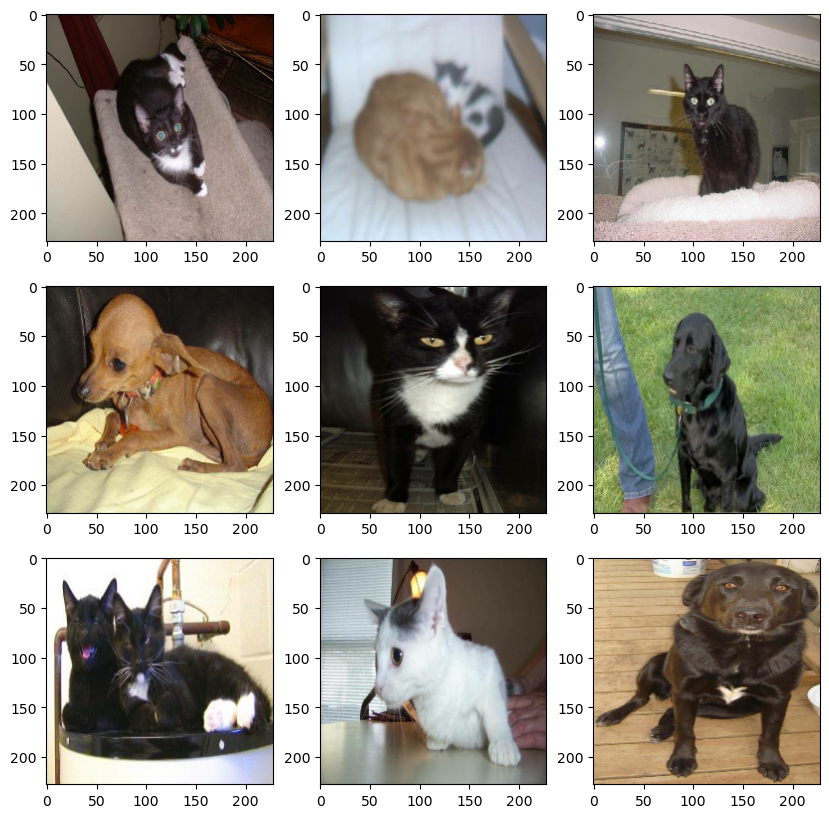

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

In [51]:
#Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))
test_ds = test_ds.map(lambda x,y: (normalization_layer(x),y))

In [52]:
#create cnn model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu',input_shape=(228,228,3)),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),

    Conv2D(16, kernel_size=(3,3), padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),

    Conv2D(8, kernel_size=(3,3), padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),

    Conv2D(4, kernel_size=(3,3), padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),

    Conv2D(2, kernel_size=(3,3), padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [53]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 226, 226, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 113, 113, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 111, 111, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 53, 53, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 4)      │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 10, 10, 2)      │            74 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,895 (85.53 KB)

 Trainable params: 21,895 (85.53 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(train_ds, epochs=10)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.5294 - loss: 0.6891
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.6073 - loss: 0.6591
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 0.6440 - loss: 0.6313
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.6700 - loss: 0.6046
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.6939 - loss: 0.5814
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step - accuracy: 0.7060 - loss: 0.5625
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.7155 - loss: 0.5616
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.7402 - loss: 0.5277
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.7506 - loss: 0.5138
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.7589 - loss: 0.5051


In [66]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

11/11 - 0s - 43ms/step - accuracy: 0.7401 - loss: 0.5275
0.7400990128517151


<_MapDataset element_spec=(TensorSpec(shape=(None, 228, 228, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>